<a href="https://colab.research.google.com/github/NanThanThanSoe/OfflineHandwrittenRecognition/blob/master/DIPWS1%5BNan%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DIP Workshop 1 (7 April 2020)

- By Nan Than Than Soe

In [1]:
!pip install polarTransform

In [0]:
# import required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import polarTransform
import math

from skimage.transform import warp_polar, rotate, rescale
from skimage.util import img_as_float
from skimage.feature import register_translation

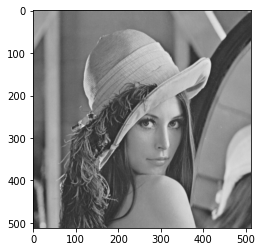

In [3]:
origin = cv2.imread("/content/drive/My Drive/lena_gray.bmp")
plt.imshow(origin)

In [0]:
# rotated image is the rotated version of image 1
# crop image is the result of central crop region of origin image
angle = 45
scale = 4
rotated_image = rotate(origin, angle)
crop_image = tf.image.central_crop(origin, central_fraction = 0.5)

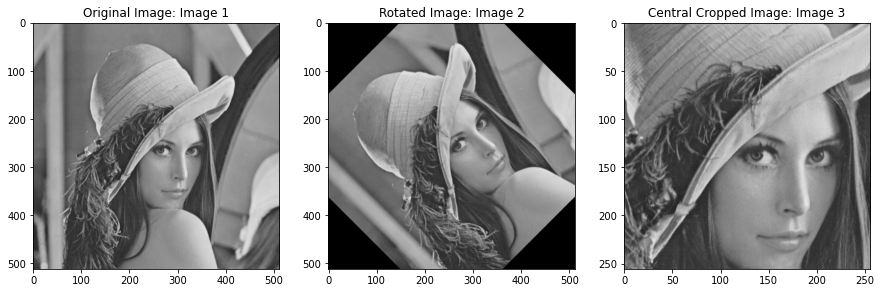

In [5]:
# display images
fig, axes = plt.subplots(1, 3, figsize=(15, 15))
ax = axes.ravel()
ax[0].set_title("Original Image: Image 1")  #Image 1 is the original image
ax[0].imshow(origin)
ax[1].set_title("Rotated Image: Image 2")  #Image 2 is the rotated version of original image/image 1
ax[1].imshow(rotated_image)
ax[2].set_title("Central Cropped Image: Image 3")
ax[2].imshow(crop_image)


In [6]:
shifts, error, phasediff = register_translation(origin, rotated_image)
print("Expected value for counterclockwise rotation in degrees: "f"{angle}")
print("Recovered value for counterclockwise rotation: "f"{shifts[0]}")

Expected value for counterclockwise rotation in degrees: 45
Recovered value for counterclockwise rotation: -118.0


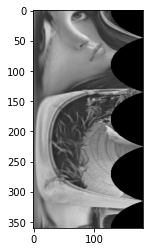

Radius r is 181.01933598375618


In [7]:
# polar counter part of crop image, image 1
image1 = img_as_float(crop_image)
(X,Y) = image1.shape[:2]
radius = math.sqrt((X**2)+(Y**2))/2   #square root of (w square and h square, divided by 2)
polarImage1 = warp_polar(image1, radius = radius, multichannel=True)
plt.imshow(polarImage1, origin='upper')
plt.show()
print("Radius r is", radius)

In [8]:
theta = math.atan(Y/X)   #tan inverse
print("Theta result in radian is",theta)    # the output is in radian
print("Theta result in degree is",math.degrees(theta)) #the output is in degree

Theta result in radian is 0.7853981633974483
Theta result in degree is 45.0


In [0]:
# image 2 is the rotated version of image 1 
#  image 2 and central crop
image2 = img_as_float(rotated_image)
crop_image2 = tf.image.central_crop(image2, central_fraction = 0.5)

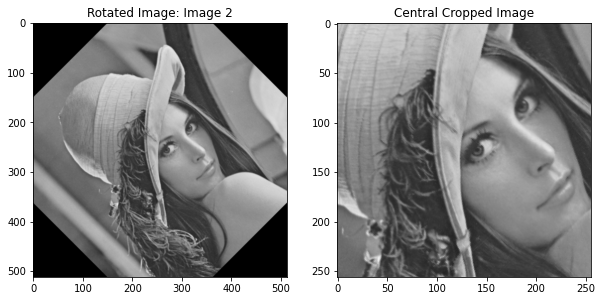

In [10]:
# display image 2 and central cropped image
fig, axes = plt.subplots(1, 2, figsize=(10, 10))
ax = axes.ravel()
ax[0].set_title("Rotated Image: Image 2")  
ax[0].imshow(image2)
ax[1].set_title("Central Cropped Image")  
ax[1].imshow(crop_image2)

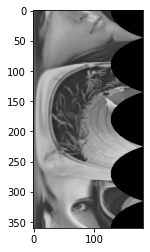

In [11]:
# Polar transform of image 2 
image2 = img_as_float(crop_image2)
(X,Y) = image2.shape[:2]
radius = math.sqrt((X**2)+(Y**2))/2   #square root of (w square and h square, divided by 2)
polarImage2 = warp_polar(image2, radius = radius, multichannel=True)
plt.imshow(polarImage2, origin='upper')
plt.show()

In [12]:
# cross correlate polar image 1 and polar image 2
# cross-correlation is used for finding translational offsets (phase shifts) between two images 
# in polor coordinate space, cross-correlation is corresponding to the rotation differences between two images
# in order to compute it, the two images have to have the same size, otherwise can't calculate

shifts, error, phasediff = register_translation(polarImage1, polarImage2)
print("Expected value for counterclockwise rotation in degrees: "
      f"{angle}")
print("Recovered value for counterclockwise rotation: "
      f"{shifts[0]}")

maxCorr = 0
res = cv2.matchTemplate(polarImage1.astype(np.float32), polarImage2.astype(np.float32), cv2.TM_CCOEFF_NORMED)
minVal,maxVal,minLoc,maxLoc = cv2.minMaxLoc(res)
if (maxVal > maxCorr):
      maxCorr = maxVal

print(f"Maximum correlation: {maxCorr}")

Expected value for counterclockwise rotation in degrees: 45
Recovered value for counterclockwise rotation: 45.0
Maximum correlation: 0.6949968338012695


In [0]:
# log polar transformation
log_polar1 = warp_polar(image1, radius=radius, scaling='log', multichannel=True)
log_polar2 = warp_polar(image2, radius=radius, scaling='log', multichannel=True)

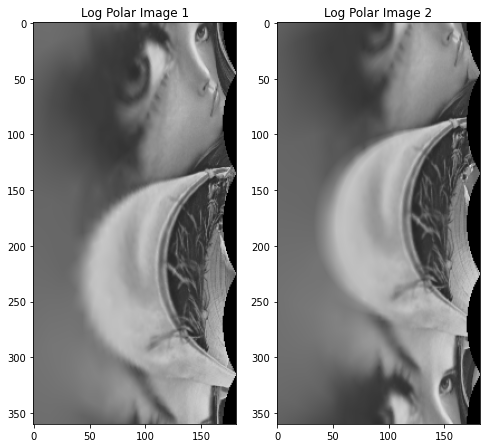

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(8, 8))
ax = axes.ravel()
ax[0].set_title("Log Polar Image 1")
ax[0].imshow(log_polar1)
ax[1].set_title("Log Polar Image 2")
ax[1].imshow(log_polar2)
plt.show()

In [15]:
# cross correlate log polar image 1 and polar image 2
# cross-correlation is used for finding translational offsets (phase shifts) between two images 
# in polor coordinate space, cross-correlation is corresponding to the rotation between two images

shifts, error, phasediff = register_translation(log_polar1, log_polar2)
print("Expected value for counterclockwise rotation in degrees: "
      f"{angle}")
print("Recovered value for counterclockwise rotation: "
      f"{shifts[0]}")

maxCorr = 0
res = cv2.matchTemplate(log_polar1.astype(np.float32), log_polar2.astype(np.float32), cv2.TM_CCOEFF_NORMED)
minVal,maxVal,minLoc,maxLoc = cv2.minMaxLoc(res)
if (maxVal > maxCorr):
      maxCorr = maxVal

print(f"Maximum correlation: {maxCorr}")

Expected value for counterclockwise rotation in degrees: 45
Recovered value for counterclockwise rotation: 45.0
Maximum correlation: 0.5758644342422485


In [0]:
# setting `upsample_factor` can increase precision
tparams = register_translation(polarImage1, polarImage2, upsample_factor=20)
shifts, error, phasediff = tparams
shiftr, shiftc = shifts[:2]

# Calculate scale factor from translation
klog = radius / np.log(radius)
shift_scale = 1 / (np.exp(shiftc / klog))

In [17]:
print(f"Expected value for cc rotation in degrees: {angle}")
print(f"Recovered value for cc rotation: {shiftr}")
print()
print(f"Expected value for scaling difference: {scale}")
print(f"Recovered value for scaling difference: {shift_scale}")

Expected value for cc rotation in degrees: 45
Recovered value for cc rotation: 45.0

Expected value for scaling difference: 4
Recovered value for scaling difference: 1.0


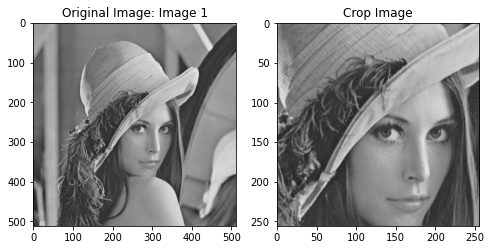

In [18]:
# compare original and crop image to calculate cross correlation between original and crop image
fig, axes = plt.subplots(1, 2, figsize=(8, 8))
ax = axes.ravel()
ax[0].set_title("Original Image: Image 1")
ax[0].imshow(origin)
ax[1].set_title("Crop Image")
ax[1].imshow(crop_image)
plt.show()

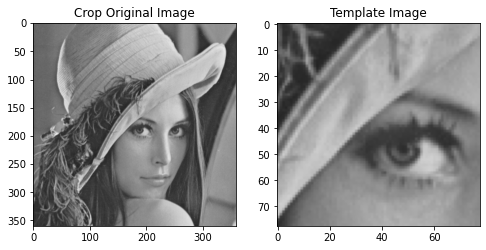

In [19]:
rect_crop = 0.3;
rect_origin = 0.7;
sub_crop = tf.image.central_crop(crop_image,central_fraction=rect_crop);
sub_origin = tf.image.central_crop(origin,central_fraction=rect_origin);

fig, axes = plt.subplots(1, 2, figsize=(8, 8))
ax = axes.ravel()
ax[0].set_title("Crop Original Image")
ax[0].imshow(sub_origin)
ax[1].set_title("Template Image")
ax[1].imshow(sub_crop)
plt.show()

In [0]:
# log polar transformation of crop original image and template image
sub_origin = img_as_float(sub_origin)
sub_crop = img_as_float(sub_crop)
(w,h) = sub_crop.shape[:2]
(w,h) = sub_origin.shape[:2]
r = math.sqrt((w**2)+(h**2))/2
log_sub_origin = warp_polar(sub_origin, radius=r, scaling='log', multichannel=True)
log_sub_crop = warp_polar(sub_crop, radius=r, scaling='log', multichannel=True)

In [21]:
res = cv2.matchTemplate(log_sub_crop.astype(np.float32), log_sub_origin.astype(np.float32), cv2.TM_CCOEFF_NORMED)
maxCorr = 0
minVal,maxVal,minLoc,maxLoc = cv2.minMaxLoc(res)
if (maxVal > maxCorr):
      maxCorr = maxVal

print(maxCorr)
print(f"Maximum correlation: {maxCorr}")

0.464156836271286
Maximum correlation: 0.464156836271286


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


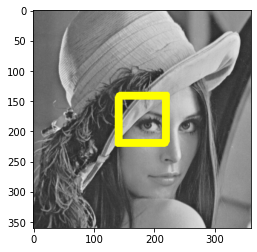

In [22]:
threshold = 0.8
template = img_as_float(sub_crop)
(w, h) = template.shape[:2]
match = cv2.matchTemplate(sub_origin.astype(np.float32), template.astype(np.float32), cv2.TM_CCOEFF_NORMED)
position = np.where( match >= threshold)  
# Draw a rectangle around the matched region. 
for pt in zip(*position[::-1]): 
    cv2.rectangle(sub_origin, pt, (pt[0] + w, pt[1] + h), (153, 22, 0), 5) 

plt.imshow(sub_origin)

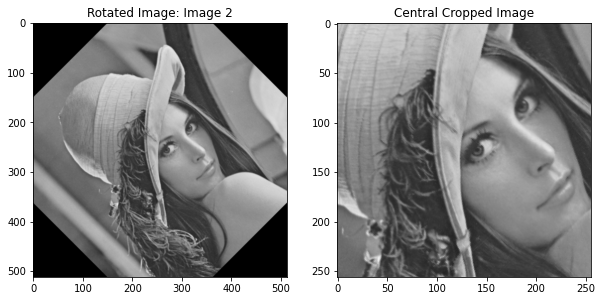

In [23]:
# compare image 2  and central cropped image to calculate cross correlation between original and crop image
ima2 = img_as_float(rotated_image)
fig, axes = plt.subplots(1, 2, figsize=(10, 10))
ax = axes.ravel()
ax[0].set_title("Rotated Image: Image 2")  
ax[0].imshow(ima2)
ax[1].set_title("Central Cropped Image")  
ax[1].imshow(crop_image2)

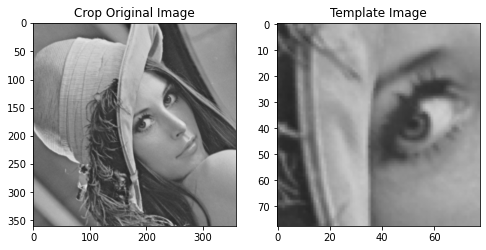

In [24]:
rect_crop = 0.3;
rect_origin = 0.7;
sub_crop2 = tf.image.central_crop(crop_image2,central_fraction=rect_crop);
sub_origin2 = tf.image.central_crop(ima2,central_fraction=rect_origin);

fig, axes = plt.subplots(1, 2, figsize=(8, 8))
ax = axes.ravel()
ax[0].set_title("Crop Original Image")
ax[0].imshow(sub_origin2)
ax[1].set_title("Template Image")
ax[1].imshow(sub_crop2)
plt.show()

In [0]:
# log polar transformation of crop rotated image 2 and template image 2
sub_origin2 = img_as_float(sub_origin2)
sub_crop2 = img_as_float(sub_crop2)
(w,h) = sub_crop2.shape[:2]
(w,h) = sub_origin2.shape[:2]
r = math.sqrt((w**2)+(h**2))/2
log_sub_origin2 = warp_polar(sub_origin2, radius=r, scaling='log', multichannel=True)
log_sub_crop2 = warp_polar(sub_crop2, radius=r, scaling='log', multichannel=True)

In [26]:
res2 = cv2.matchTemplate(log_sub_crop2.astype(np.float32), log_sub_origin2.astype(np.float32), cv2.TM_CCOEFF_NORMED)
maxCorr2 = 0
minVal2,maxVal2,minLoc2,maxLoc2 = cv2.minMaxLoc(res2)
if (maxVal2 > maxCorr2):
      maxCorr2 = maxVal2

print(maxCorr2)
print(f"Maximum correlation: {maxCorr2}")

0.44823896884918213
Maximum correlation: 0.44823896884918213


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


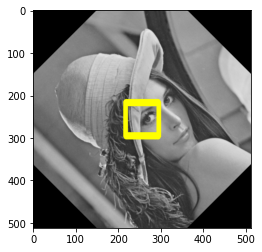

In [27]:
threshold = 0.8
template2 = img_as_float(sub_crop2)
(w, h) = template2.shape[:2]
match2 = cv2.matchTemplate(ima2.astype(np.float32), template2.astype(np.float32), cv2.TM_CCOEFF_NORMED)
position2 = np.where( match2 >= threshold)  
# Draw a rectangle around the matched region. 
for pt in zip(*position2[::-1]): 
    cv2.rectangle(ima2, pt, (pt[0] + w, pt[1] + h), (153, 22, 0), 5) 

plt.imshow(ima2)